In [1]:
from pynq import PL
from pynq import Overlay
from pynq import allocate

import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [65]:
PL.reset()
xadc_stream = Overlay('adc_stream.bit')

dma   = xadc_stream.axi_dma_0
xgpio = xadc_stream.axi_gpio_0

In [66]:
xgpio.read(8)

41310

In [67]:
xgpio.write(0,17)

In [86]:
input_buffer = allocate(shape=(8200,), dtype=np.uint32)

In [87]:
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer/2**16
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1
        


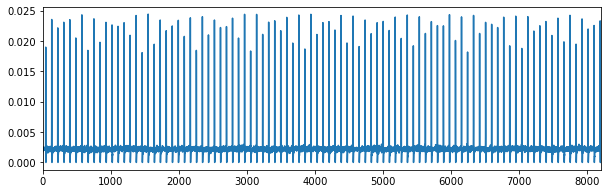

In [88]:
plt.figure(figsize=(10,3))
plt.plot(range(0, 8200), input_buffer1)
plt.xlim(0, 8200)
plt.show()

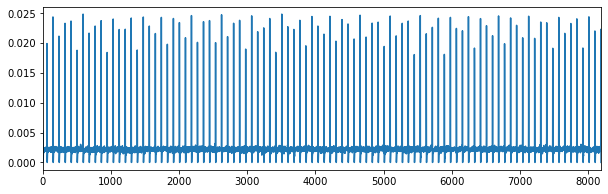

In [110]:
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer/2**16
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1
        
plt.figure(figsize=(10,3))
plt.plot(range(0, 8200), input_buffer1)
plt.xlim(0, 8191)
plt.show()